In [168]:
%matplotlib inline

#data processing

import numpy as np
import pandas as pd

#data visualization

import matplotlib.pyplot as plt
import seaborn as sns

#data predications

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [169]:
database = "titanic/train.csv"
titanic = pd.read_csv(database)

In [170]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


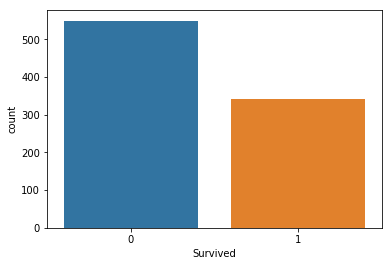

In [171]:
#for getting data of surviving people
sns.countplot(x = 'Survived' ,data = titanic)

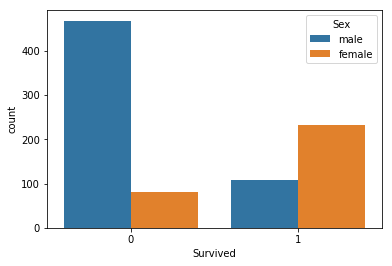

In [172]:
sns.countplot(x = 'Survived' , hue = 'Sex' , data = titanic)

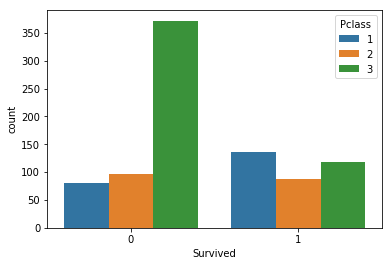

In [173]:
sns.countplot( x = 'Survived' , hue = 'Pclass' , data= titanic)

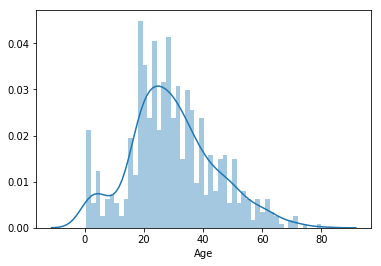

In [174]:
sns.distplot(titanic['Age'].dropna(),bins = 50)

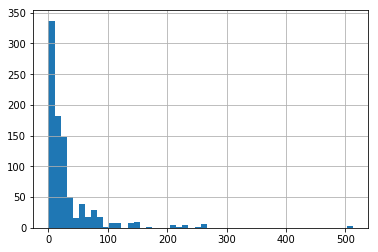

In [175]:
titanic['Fare'].hist(bins = 50)

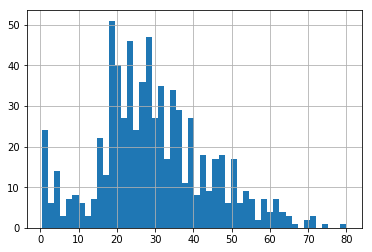

In [176]:
titanic['Age'].hist(bins=50)

In [177]:
#Cleaning the Data


In [178]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [179]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


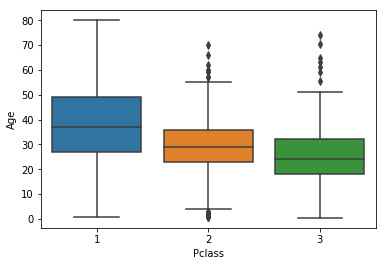

In [180]:
#sns.boxplot(x='SibSp',y='Age',data=titanic,palette='winter')
sns.boxplot(x = 'Pclass' , y = 'Age' , data = titanic)

In [181]:
#sns.lmplot(x='Age', y='Parch', data=titanic)
#i am doing this according to answer but i will trying again
def defineage(cols):
    age= cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        elif pclass==3:
            return 24
    else:
        return age

In [229]:
def definecatage(cols):
    age = cols[0]
    if age < 5:
        return 0
    elif age < 10:
        return 1
    elif age < 15:
        return 2
    elif age < 20:
        return 3
    elif age < 25:
        return 4
    elif age < 30:
        return 5
    elif age < 35:
        return 6
    elif age < 40:
        return 7
    elif age < 45:
        return 8
    elif age < 50:
        return 9
    elif age < 55:
        return 10
    elif age < 60:
        return 11
    elif age < 65:
        return 12
    elif age < 70:
        return 13
    elif age < 75:
        return 14
    elif age < 80:
        return 15
    else:
        return 16

In [230]:
titanic['Age'] = titanic[['Age' , 'Pclass']].apply(defineage , axis = 1)

In [231]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null int64
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB


In [232]:
def defcabin(cols):
    cabin = cols[0]
    if type(cabin)==str:
        return 1
    else:
        return 0


In [233]:
titanic['Cabin'] = titanic[['Cabin']].apply(defcabin , axis = 1)

In [234]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [235]:
titanic_new = titanic.dropna(axis=0)

In [236]:
titanic_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          889 non-null int64
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 90.3+ KB


In [237]:
sex = pd.get_dummies(titanic_new['Sex'],drop_first = True)
embarked = pd.get_dummies(titanic_new['Embarked'], drop_first = True)
titanic_new.drop(['Sex','Embarked', 'Ticket', 'Name'],axis =1,inplace= True)

In [238]:
titanic_new = pd.concat([titanic_new,sex,embarked] ,axis =1)

In [239]:
titanic_new['Age'] = titanic_new[['Age']].apply(definecatage , axis = 1)

In [240]:
titanic_new.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.0,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,5.335208,0.524184,0.382452,32.096681,0.0,0.649044,0.086614,0.724409
std,256.998173,0.486260,0.834700,2.705955,1.103705,0.806761,49.697504,0.0,0.477538,0.281427,0.447063
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,4.000000,0.000000,0.000000,7.895800,0.0,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,5.000000,0.000000,0.000000,14.454200,0.0,1.000000,0.000000,1.000000
75%,668.000000,1.000000,3.000000,7.000000,1.000000,0.000000,31.000000,0.0,1.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,16.000000,8.000000,6.000000,512.329200,0.0,1.000000,1.000000,1.000000


In [379]:
t_train, t_test ,s_train ,s_test = train_test_split(titanic_new.drop('Survived',axis=1),titanic_new['Survived'] , test_size = 0.25 , random_state=101)

In [380]:
model = LogisticRegression()
#model.fit(t_train , s_train)
model.fit(titanic_new.drop('Survived',axis=1),titanic_new['Survived'])

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [381]:
pred = model.predict(t_test)

In [382]:
print(accuracy_score(s_test, pred))

0.8340807174887892


In [386]:
#Trying tree Model 
from sklearn import tree
generalized_tree = tree.DecisionTreeClassifier(random_state =70 , max_depth =7 , min_samples_split = 4)
#generalized_tree = tree.DecisionTreeClassifier()
#generalized_tree.fit(t_train , s_train )
generalized_tree.fit(titanic_new.drop('Survived',axis=1),titanic_new['Survived'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=70,
            splitter='best')

In [387]:
pred_tree = generalized_tree.predict(t_test)
print(accuracy_score(s_test, pred_tree))

0.9013452914798207


In [365]:
test_database = "titanic/test.csv"
test_titanic = pd.read_csv(test_database)

In [366]:
#test_titanic_new.isna().sum()
test_titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [367]:
test_titanic['Age'] = test_titanic[['Age' , 'Pclass']].apply(defineage , axis = 1)
test_titanic['Cabin'] = test_titanic[['Cabin']].apply(defcabin , axis = 1)


In [368]:
test_titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,29.321770,0.447368,0.392344,35.627188,0.217703
std,120.810458,0.841838,12.904065,0.896760,0.981429,55.907576,0.413179
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,25.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,36.375000,1.000000,0.000000,31.500000,0.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [369]:
#test_titanic_new["Fare"] = test_titanic["Fare"].fillna((test_titanic["Fare"].median()),inplace= True)
#test_titanic_new = test_titanic.dropna(axis=0)
test_titanic['Fare'] = test_titanic['Fare'].fillna(test_titanic['Fare'].median())
test_titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.321770,0.447368,0.392344,35.576535,0.217703
std,120.810458,0.841838,12.904065,0.896760,0.981429,55.850103,0.413179
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,25.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,36.375000,1.000000,0.000000,31.471875,0.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [370]:
sex = pd.get_dummies(test_titanic['Sex'],drop_first = True)
embarked = pd.get_dummies(test_titanic['Embarked'], drop_first = True)
test_titanic.drop(['Sex','Embarked', 'Ticket', 'Name'],axis =1,inplace= True)


In [371]:
test_titanic = pd.concat([test_titanic,sex,embarked] ,axis =1)
test_titanic['Age'] = test_titanic[['Age']].apply(definecatage , axis = 1)

In [372]:
test_titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,5.409091,0.447368,0.392344,35.576535,0.217703,0.636364,0.110048,0.645933
std,120.810458,0.841838,2.640328,0.896760,0.981429,55.850103,0.413179,0.481622,0.313324,0.478803
min,892.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,4.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000
50%,1100.500000,3.000000,5.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,1.000000
75%,1204.750000,3.000000,7.000000,1.000000,0.000000,31.471875,0.000000,1.000000,0.000000,1.000000
max,1309.000000,3.000000,15.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [373]:
answer = model.predict(test_titanic)

In [374]:
#print(accuracy_score(answer, test_titanic_new['Survived']))

In [375]:
answer_tree = generalized_tree.predict(test_titanic)
#print(accuracy_score(answer_tree, test_titanic_new['Survived']))

In [376]:
output = pd.DataFrame({'PassengerId': test_titanic['PassengerId'],
                        'Survived': answer})

In [377]:
output.to_csv('submission.csv', index=False)

In [388]:
output = pd.DataFrame({'PassengerId': test_titanic['PassengerId'],
                        'Survived': answer_tree})
output.to_csv('submission_tree.csv', index=False)